# Search-coil Magnetometer (SCM)

This notebook shows how to load and plot MMS SCM data with pySPEDAS and pyTplot

For information on the data, please see the Data Products Guide at:

https://lasp.colorado.edu/mms/sdc/public/datasets/fields/

## Get started

To get started, import the `scm` function from the `pyspedas.mms` module, and `tplot` from `pytplot`

In [14]:
from pyspedas.mms import scm
from pytplot import tplot
from pyspedas import tdpwrspc

Select SATNAME ('1','2','3', or '4')

In [3]:
satname = '4'

Select data rate ('srvy' or 'brst')

In [4]:
scm_data_rate = 'srvy' # or 'brst'

Select mode ('scsrvy' for survey data rate (both slow and fast have 32 S/s), 'scb' (8192 S/s) or 'schb' (16384 S/s) for burst data rate)

In [5]:
scm_datatype = 'scsrvy' # or 'scb'

In [6]:
scm_name = 'mms'+satname+'_scm_acb_gse_'+scm_datatype+'_'+scm_data_rate+'_l2'

## Load the survey mode SCM data

In [7]:
scm_vars = scm(trange=['2015-10-16', '2015-10-16/3:00'], probe=satname, time_clip=True)

SDC username (blank for public access): 


26-Jan-22 23:48:30: Downloading mms4_scm_srvy_l2_scsrvy_20151016_v2.2.3.cdf to pydata/mms4/scm/srvy/l2/scsrvy/2015/10


Time clip was applied to: mms4_scm_acb_gse_scsrvy_srvy_l2
Loaded variables:
mms4_scm_acb_gse_scsrvy_srvy_l2


## Plot the survey mode data in GSE coordinates

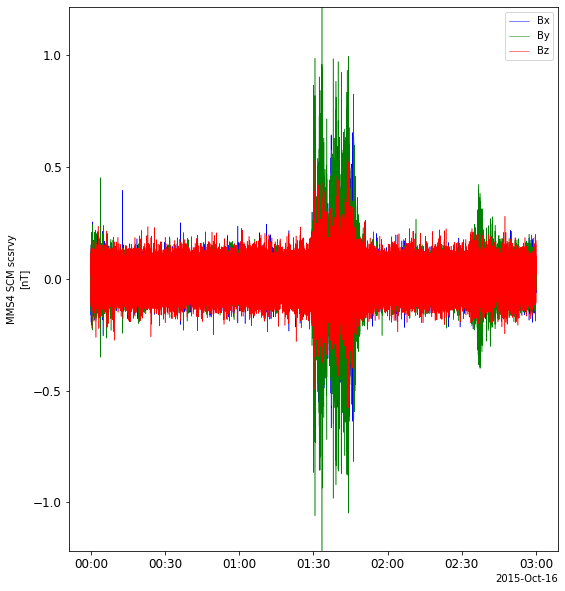

In [8]:
tplot(scm_name)

## Dynamic Power Spectra

Calculate the dynamic power spectra without overlapping nshiftpoints=nboxpoints

In [9]:
if scm_datatype == 'scb': 
    nboxpoints_input = 8192 
else:
    nboxpoints_input = 512

In [10]:
pwrspc_var = tdpwrspc(scm_name, nboxpoints=nboxpoints_input, nshiftpoints=nboxpoints_input, binsize=1)

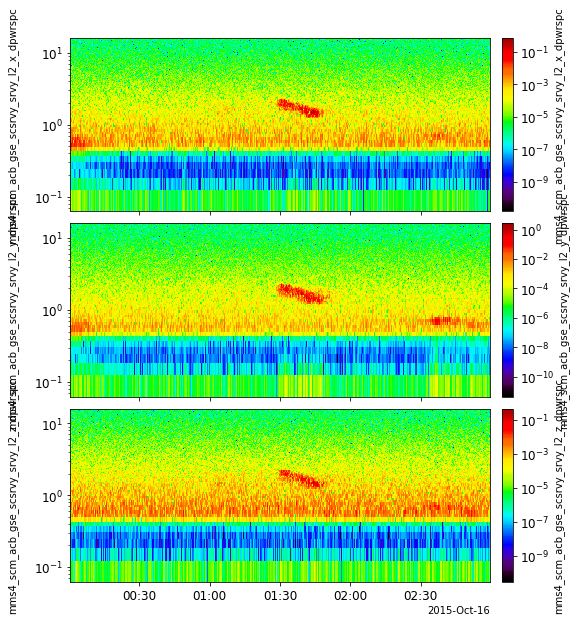

In [11]:
tplot(pwrspc_var)

## Load the burst mode data

In [12]:
burst_vars = scm(data_rate='brst', trange=['2015-10-16/13:06', '2015-10-16/13:07'])

26-Jan-22 23:48:52: Downloading mms1_scm_brst_l2_schb_20151016130524_v2.2.0.cdf to pydata/mms1/scm/brst/l2/schb/2015/10/16
26-Jan-22 23:48:57: Downloading mms1_scm_brst_l2_scb_20151016130524_v2.2.0.cdf to pydata/mms1/scm/brst/l2/scb/2015/10/16


Time clip was applied to: mms1_scm_acb_gse_scb_brst_l2
Time clip was applied to: mms1_scm_acb_gse_schb_brst_l2
Loaded variables:
mms1_scm_acb_gse_scb_brst_l2
mms1_scm_acb_gse_schb_brst_l2


## Plot the burst mode data in GSE coordinates

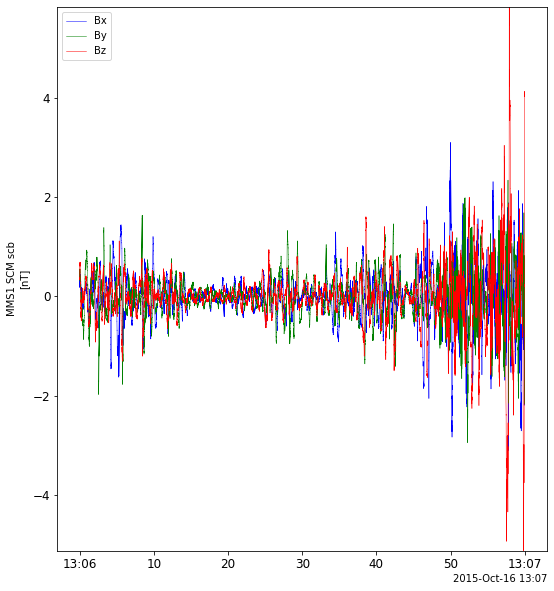

In [13]:
tplot('mms1_scm_acb_gse_scb_brst_l2')